In [53]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

In [54]:
# Load your dataset
df = pd.read_csv("climate_change_dataset.csv")

In [55]:
# Ensure no missing in target
df = df.dropna(subset=["Extreme Weather Events"])

In [56]:
# Features and target
X = df.drop(columns=["Extreme Weather Events"])
y = df["Extreme Weather Events"]

In [57]:
# Identify feature types
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [58]:
# Build transformers
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

# Final pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year',
                                                   'Avg Temperature (°C)',
                                                   'CO2 Emissions '
                                                   '(Tons/Capita)',
                                                   'Sea Level Rise (mm)',
                                                   'Rainfall (mm)',
                                                   'Population',
                                                   'Renewable Energy (%)',
                                                   'Forest Area (%)']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [59]:
# Save model and features
features_cols = list(X.columns)
joblib.dump(features_cols, "features_cols.pkl")
joblib.dump(pipeline, "model_curated.pkl")

['model_curated.pkl']

In [60]:
# STEP 9: Predict and evaluate
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 3.6156
RMSE: 18.1927


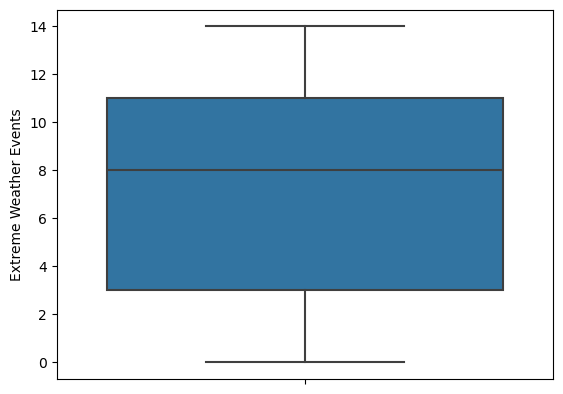

In [61]:
# try checking outliers
sns.boxplot(y=y)
plt.show()